In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [8]:
df = pd.read_csv('bank-full.csv')

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.shape

(45211, 17)

In [16]:
df['Target'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

@there are no null values

<AxesSubplot:>

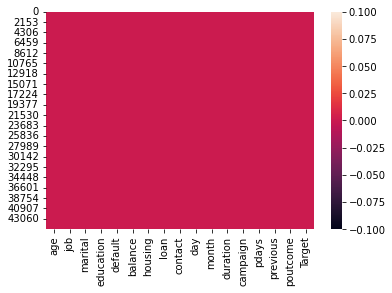

In [18]:
sns.heatmap(df.isnull())

In [20]:
#checking dtypes
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [21]:
#checking is any duplicate value are present
df.duplicated().sum()

0

In [23]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

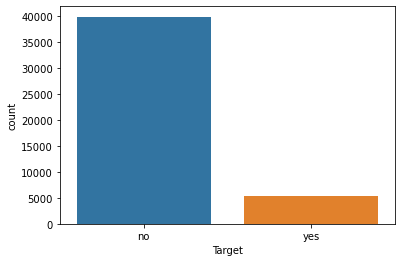

In [25]:
sns.countplot(data = df,x = 'Target')
plt.show()

In [26]:
#splitting datatype in numerical and categorical
df_num = df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [29]:
df_num


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [30]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [31]:
###to convert categorical dtypes into numeruc
#using lable encoder
from sklearn.preprocessing import LabelEncoder

In [32]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [33]:
df_cat.dtypes

job          int32
marital      int32
education    int32
default      int32
housing      int32
loan         int32
contact      int32
month        int32
poutcome     int32
Target       int32
dtype: object

In [35]:
df_new = pd.concat([df_num,df_cat],axis = 1)

In [36]:
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [37]:
#splitting data in train and test

In [38]:
X = df_new.drop('Target',axis = 1)
Y = df_new['Target']

In [40]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3


In [41]:
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.3,random_state = 1)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [44]:
X_train

array([[ 0.09881684,  0.42807061, -0.09973222, ...,  1.49797145,
         0.83078232,  0.44805792],
       [-0.37151499,  0.31707647,  0.49973948, ...,  1.49797145,
         0.16768173,  0.44805792],
       [-0.84184683, -0.14337018,  0.14005646, ..., -0.7181473 ,
        -1.82162004,  0.44805792],
       ...,
       [-0.93591319, -0.47384628,  1.09921117, ..., -0.7181473 ,
        -1.49006974,  0.44805792],
       [ 0.85134778, -0.47205606, -1.53846429, ...,  1.49797145,
        -0.16386856,  0.44805792],
       [-0.46558136,  1.65938947,  0.73952815, ..., -0.7181473 ,
         1.82543321, -0.55964522]])

In [45]:
# Create the model of LofisticRegression, Why?
# Because we predict the output in Yes/no format as we have a classification type dataset.
# # Use baseline model : LogisticRegression
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()


In [47]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [48]:
Y_pred = lr.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
dict = {'Actual Output': Y_test,'Predicted Output':Y_pred}
df1 = pd.DataFrame(dict)
df1.head(20)

,Actual Output,Predicted Output
6149,0,0
12403,0,0
21645,0,0
29580,0,0
31245,0,0
32032,0,0
18295,0,0
42774,1,0
26345,0,0
31747,0,0


In [50]:
lr.score(X_test,Y_test)

0.8906373431920878

In [51]:
#classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     27909
           1       0.61      0.20      0.30      3738

    accuracy                           0.89     31647
   macro avg       0.76      0.59      0.62     31647
weighted avg       0.87      0.89      0.87     31647

